In [18]:
import pandas as pd
import numpy as np

def get_stock_df(code: str) -> pd.DataFrame:
    df = pd.read_csv(f'../data/{code}.XSHE_2023-03-28_2024-04-03.csv')
    return df

In [3]:
df = get_stock_df("000001")

In [4]:
df[:2]

,date,open,close,high,low,volume,money,factor
0,2023-03-28,11.53,11.52,11.60,11.43,73959636.0,851797869.0,0.91113
1,2023-03-29,11.60,11.42,11.61,11.39,65420339.0,750687551.0,0.91113


In [5]:
df.iloc[1, 0]

'2023-03-29'

In [6]:
df.loc[1, "close"]

11.42

In [7]:
df.shape

(248, 8)

In [8]:
df.columns

Index(['date', 'open', 'close', 'high', 'low', 'volume', 'money', 'factor'], dtype='object')

In [9]:
close_price = {}

close_price["000001"] = df['close']

close_price

{'000001': 0      11.52
 1      11.42
 2      11.55
 3      11.42
 4      11.54
        ...  
 243     9.79
 244     9.82
 245     9.93
 246     9.85
 247     9.76
 Name: close, Length: 248, dtype: float64}

In [10]:
df34 = get_stock_df("000034")
df35 = get_stock_df("000035")

close_price["000034"] = df34["close"]
close_price["000035"] = df35["close"]

close_df = pd.DataFrame(close_price)

close_df

,000001,000034,000035
0,11.52,30.49,5.23
1,11.42,30.16,5.13
2,11.55,29.30,5.13
3,11.42,30.53,5.15
4,11.54,31.69,5.10
...,...,...,...
243,9.79,30.65,4.26
244,9.82,29.10,4.39
245,9.93,29.57,4.40
246,9.85,28.64,4.47


In [11]:
close_df.corr()

,000001,000034,000035
000001,1.000000,-0.218875,0.187163
000034,-0.218875,1.000000,0.320088
000035,0.187163,0.320088,1.000000


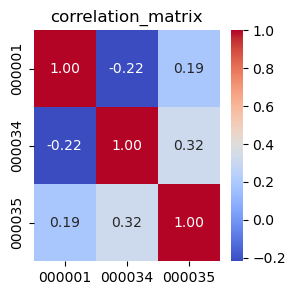

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算DataFrame中所有列之间的相关性
correlation_matrix = close_df.corr()

plt.figure(figsize=correlation_matrix.shape)

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title("correlation_matrix")

plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

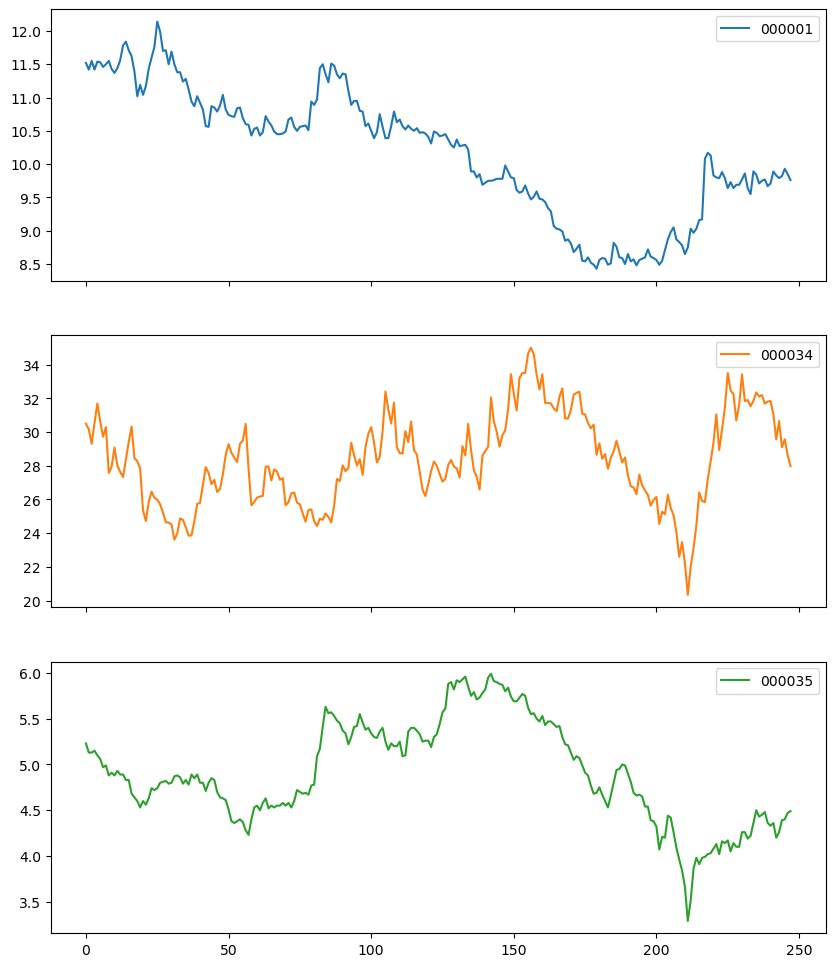

In [15]:
# figsize绘制图的大小，subplots是否分来画，还是集成在一个图里面
close_df.plot(figsize=(10, 12), subplots=True)

In [16]:
close_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   000001  248 non-null    float64
 1   000034  248 non-null    float64
 2   000035  248 non-null    float64
dtypes: float64(3)
memory usage: 5.9 KB


In [17]:
close_df.describe().round(2)

,000001,000034,000035
count,248.00,248.00,248.00
mean,10.16,28.35,4.90
std,0.96,2.70,0.56
min,8.43,20.34,3.29
25%,9.57,26.30,4.53
50%,10.39,28.24,4.83
75%,10.85,30.45,5.36
max,12.14,35.00,5.99


In [19]:
close_df.aggregate([min, max, np.mean, np.std, np.median])

,000001,000034,000035
min,8.430000,20.340000,3.290000
max,12.140000,35.000000,5.990000
mean,10.159758,28.354153,4.901895
std,0.962683,2.695074,0.555968
median,10.390000,28.245000,4.830000
